In [1]:
import pandas as pd 
import numpy as np

# load file from Baseball Reference (https://www.baseball-reference.com/players/p/pujolal01.shtml)
file = "resources/pujols_stats_csv.csv"

#read stat data into pandas df
pujols_df = pd.read_csv(file, header=0)
pujols_df.head

<bound method NDFrame.head of     Year  Age   Tm  Lg    G   PA   AB    R    H  2B  ...    OPS  OPS+   TB  \
0   2001   21  STL  NL  161  676  590  112  194  47  ...  1.013   157  360   
1   2002   22  STL  NL  157  675  590  118  185  40  ...  0.955   151  331   
2   2003   23  STL  NL  157  685  591  137  212  51  ...  1.106   187  394   
3   2004   24  STL  NL  154  692  592  133  196  51  ...  1.072   173  389   
4   2005   25  STL  NL  161  700  591  129  195  38  ...  1.039   168  360   
5   2006   26  STL  NL  143  634  535  119  177  33  ...  1.102   178  359   
6   2007   27  STL  NL  158  679  565   99  185  38  ...  0.997   157  321   
7   2008   28  STL  NL  148  641  524  100  187  44  ...  1.114   192  342   
8   2009   29  STL  NL  160  700  568  124  186  45  ...  1.101   189  374   
9   2010   30  STL  NL  159  700  587  115  183  39  ...  1.011   173  350   
10  2011   31  STL  NL  147  651  579  105  173  29  ...  0.906   148  313   
11  2012   32  LAA  AL  154  670  

## Data Wrangling

In [2]:
#get column names to narrow down approach
col_list = pujols_df.columns.values.tolist()
print(col_list)

['Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos', 'Awards']


In [8]:
#create new df without Awards or Position values -- numbers only except team ID
AP_clean_df = pujols_df.drop(['Awards', 'Pos', 'Lg'], axis=1)

In [9]:
AP_clean_df

,Year,Age,Tm,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,2001,21,STL,161,676,590,112,194,47,4,...,0.403,0.610,1.013,157,360,21,9,1,7,6
1,2002,22,STL,157,675,590,118,185,40,2,...,0.394,0.561,0.955,151,331,20,9,0,4,13
2,2003,23,STL,157,685,591,137,212,51,1,...,0.439,0.667,1.106,187,394,13,10,0,5,12
3,2004,24,STL,154,692,592,133,196,51,2,...,0.415,0.657,1.072,173,389,21,7,0,9,12
4,2005,25,STL,161,700,591,129,195,38,2,...,0.430,0.609,1.039,168,360,19,9,0,3,27
5,2006,26,STL,143,634,535,119,177,33,1,...,0.431,0.671,1.102,178,359,20,4,0,3,28
6,2007,27,STL,158,679,565,99,185,38,1,...,0.429,0.568,0.997,157,321,27,7,0,8,22
7,2008,28,STL,148,641,524,100,187,44,0,...,0.462,0.653,1.114,192,342,16,5,0,8,34
8,2009,29,STL,160,700,568,124,186,45,1,...,0.443,0.658,1.101,189,374,23,9,0,8,44
9,2010,30,STL,159,700,587,115,183,39,1,...,0.414,0.596,1.011,173,350,23,4,0,6,38


In [10]:
#How long did Pujols play? How many team
team = AP_clean_df.groupby('Tm')['Year'].nunique()
print(team)

Tm
LAA    10
LAD     1
STL    12
Name: Year, dtype: int64


In [11]:
#grouping by team to see how stats changed when he switched teams
team_df= AP_clean_df.groupby(['Tm']).mean()
print(team_df)

            Year        Age           G          PA      AB      R  \
Tm                                                                   
LAA  2016.500000  36.500000  118.100000  505.300000  461.30   56.1   
LAD  2021.000000  41.000000   85.000000  204.000000  189.00   20.0   
STL  2007.333333  27.333333  144.416667  627.583333  532.75  108.5   

              H         2B    3B         HR  ...      OBP       SLG       OPS  \
Tm                                           ...                                
LAA  118.000000  21.400000  0.10  22.200000  ...  0.30270  0.435000  0.737600   
LAD   48.000000   3.000000  0.00  12.000000  ...  0.29900  0.460000  0.759000   
STL  174.166667  38.083333  1.25  37.416667  ...  0.41275  0.597833  1.010417   

           OPS+     TB        GDP       HBP        SH        SF        IBB  
Tm                                                                          
LAA  102.100000  206.2  17.100000  3.400000  0.000000  4.700000   6.200000  
LAD   99.000

In [13]:
#specific comparison between batting averages
AP_clean_df.groupby('Tm')['BA'].mean()

Tm
LAA    0.247900
LAD    0.254000
STL    0.318833
Name: BA, dtype: float64

In [14]:
#filter data to seasons healthy seasons
healthy_df = AP_clean_df.loc[(AP_clean_df['G'] > 100)]
healthy_df.reset_index(drop=True, inplace=True)
healthy_df

,Year,Age,Tm,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,2001,21,STL,161,676,590,112,194,47,4,...,0.403,0.610,1.013,157,360,21,9,1,7,6
1,2002,22,STL,157,675,590,118,185,40,2,...,0.394,0.561,0.955,151,331,20,9,0,4,13
2,2003,23,STL,157,685,591,137,212,51,1,...,0.439,0.667,1.106,187,394,13,10,0,5,12
3,2004,24,STL,154,692,592,133,196,51,2,...,0.415,0.657,1.072,173,389,21,7,0,9,12
4,2005,25,STL,161,700,591,129,195,38,2,...,0.430,0.609,1.039,168,360,19,9,0,3,27
5,2006,26,STL,143,634,535,119,177,33,1,...,0.431,0.671,1.102,178,359,20,4,0,3,28
6,2007,27,STL,158,679,565,99,185,38,1,...,0.429,0.568,0.997,157,321,27,7,0,8,22
7,2008,28,STL,148,641,524,100,187,44,0,...,0.462,0.653,1.114,192,342,16,5,0,8,34
8,2009,29,STL,160,700,568,124,186,45,1,...,0.443,0.658,1.101,189,374,23,9,0,8,44
9,2010,30,STL,159,700,587,115,183,39,1,...,0.414,0.596,1.011,173,350,23,4,0,6,38


## Visualization of Slash Line in Healthy Years

In [17]:
#create line chart of salary using plotly
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

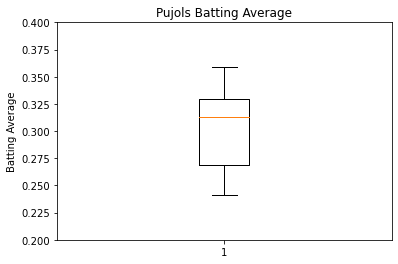

In [25]:
batting_avg = healthy_df['BA']
fig1, ax1 = plt.subplots()
ax1.set_title('Pujols Batting Average')
ax1.set_ylabel('Batting Average')
plt.ylim(.2,.4)
ax1.boxplot(batting_avg)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='BA'>

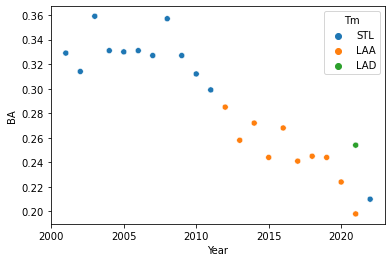

In [33]:
#seaborn scatter plot of BA grouped by team
sns.scatterplot(data=AP_clean_df, x='Year', y='BA', hue='Tm')

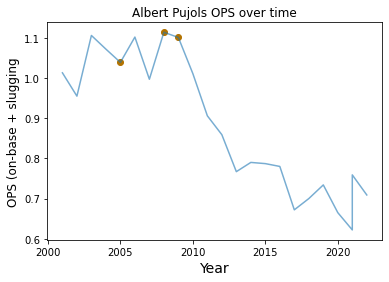

In [47]:
#create list of years he was MVP
mvp_x = [2005,2008,2009]
mvp_y = [1.039, 1.114, 1.101]
#create matplotlib plot of ops
plt.plot(AP_clean_df.Year, AP_clean_df.OPS, alpha=0.6)
plt.xlabel('Year', size=14)
plt.ylabel('OPS (on-base + slugging', size=12)
plt.title('Albert Pujols OPS over time')

#highlight mvp years
plt.scatter(mvp_x, mvp_y, color='#b27300')

plt.show()

## Visualization of Salary

In [57]:
#enter salary into df
AP_clean_df['Salary'] = ['200000','600000','900000','7000000','11000000','14000000','12937813','13870949','14427326','14595953','14508395','12000000','16000000','23000000','24000000','25000000','26000000','27000000','28000000','29000000','30000000']

In [61]:
#change pd to numeric so it can be plotted
AP_clean_df[['Year', 'Salary']] = AP_clean_df[['Year','Salary']].apply(pd.to_numeric) 

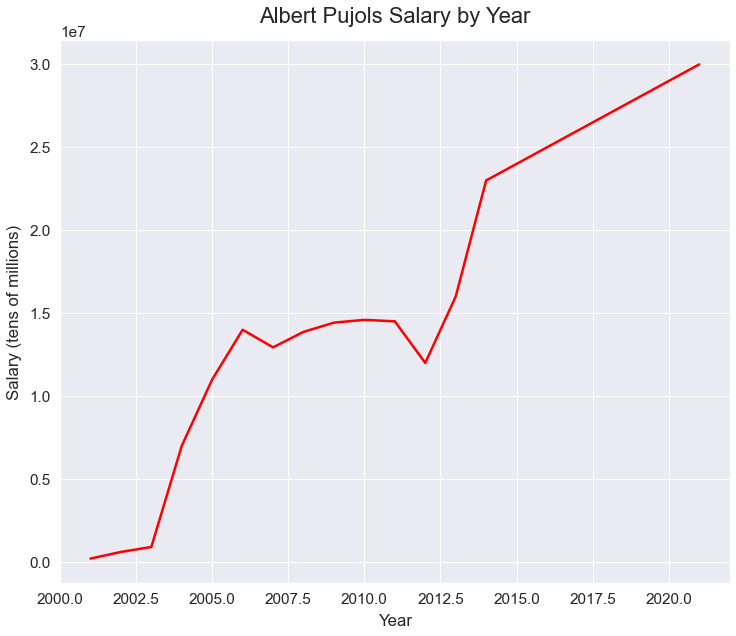

In [75]:
sns.set(font_scale=1.4)
AP_clean_df.set_index('Year')['Salary'].plot(figsize=(12,10), linewidth=2.5, color='red')
plt.xlabel('Year', labelpad=7)
plt.ylabel('Salary (tens of millions)', labelpad=7)
plt.title("Albert Pujols Salary by Year", y=1.02, fontsize=22);

,Year,Age,Tm,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Salary
0,2001,21,STL,161,676,590,112,194,47,4,...,0.610,1.013,157,360,21,9,1,7,6,200000
1,2002,22,STL,157,675,590,118,185,40,2,...,0.561,0.955,151,331,20,9,0,4,13,600000
2,2003,23,STL,157,685,591,137,212,51,1,...,0.667,1.106,187,394,13,10,0,5,12,900000
3,2004,24,STL,154,692,592,133,196,51,2,...,0.657,1.072,173,389,21,7,0,9,12,7000000
4,2005,25,STL,161,700,591,129,195,38,2,...,0.609,1.039,168,360,19,9,0,3,27,11000000


## Scraping practice from BR

In [48]:
import re
import requests
from bs4 import BeautifulSoup

In [49]:
#pull website
url = 'https://www.baseball-reference.com/players/g/gordoni01.shtml'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [64]:
soup.find('tr', attrs = {'class': 'full'})

<tr class="full" id="batting_standard.2021"><th class="left" csk="2021" data-stat="year_ID" scope="row">2021</th><td class="right" data-stat="age">25</td><td class="left" data-stat="team_ID"><a href="/teams/MIN/2021.shtml" title="Minnesota Twins">MIN</a></td><td class="left" data-stat="lg_ID"><a href="/leagues/AL/2021.shtml">AL</a></td><td class="right" data-stat="G">73</td><td class="right" data-stat="PA">216</td><td class="right" data-stat="AB">200</td><td class="right" data-stat="R">19</td><td class="right" data-stat="H">48</td><td class="right" data-stat="2B">9</td><td class="right" data-stat="3B">1</td><td class="right" data-stat="HR">4</td><td class="right" data-stat="RBI">23</td><td class="right" data-stat="SB">10</td><td class="right" data-stat="CS">1</td><td class="right" data-stat="BB">12</td><td class="right" data-stat="SO">55</td><td class="right" data-stat="batting_avg">.240</td><td class="right" data-stat="onbase_perc">.292</td><td class="right" data-stat="slugging_perc">

In [150]:
#example query, find one year batting info
row = soup.find('tr', attrs = {'id': 'batting_standard.2022'})

#extract the text
for data in row.find_all(True, {'class':['left','right']}):
    print(data.get_text())

2022
26
MIN
AL
44
131
122
14
31
6
3
1
7
3
2
5
33
.254
.295
.377
.672
98
46
2
2
2
0
0
*78/6H4D1



In [153]:
#create column names from table
header = soup.find('tr')
#extract col names
columns = [col.get_text() for col in header.find_all('th')]

#create empty df with col names from header
scrape_df = pd.DataFrame(columns=columns)
scrape_df

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards


In [183]:
#loop through rows to add to df
seasons = soup.find_all('tr', attrs={'id':re.compile('batting_standard.')})
for season in seasons:
    stats = [stat.get_text() for stat in season.find_all(True, {'class':['left','right']})]
    
    #create df for single season stats
    temp_df = pd.DataFrame(stats).transpose()
    temp_df.columns = columns

    #join single season with overall dataset
    scrape_df = pd.concat([scrape_df,temp_df], ignore_index=True)

    scrape_df.drop_duplicates(inplace=True)

scrape_df


,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
0,2021,25,MIN,AL,73,216,200,19,48,9,...,.647,80,71,7,3,0,1,0,846H7/59,
1,2022,26,MIN,AL,44,131,122,14,31,6,...,.672,98,46,2,2,2,0,0,*78/6H4D1,
